In [1]:
import os

# 0. Segmentation

In [2]:
orig_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_images"
mask_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_masks"
only_mask_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_only_masks"

In [ ]:
lower_black = np.array([255,255,255])
upper_black = np.array([255,255,255])

for img_path in os.listdir(mask_base_path):   
    mask = f"{mask_base_path}/{img_path}"
    mask = Image.open(f"{mask_base_path}/{img_path}").convert('RGB')
    mask = np.array(mask)
    mask = cv2.inRange(mask, lower_black, upper_black)
    mask = Image.fromarray(mask)
    mask.save(f"{only_mask_base_path}/{img_path}")

    #break

In [ ]:
num_pixels_x, num_pixels_y, num_channels = 1024//4, 768//4, 3

orig_images = np.zeros((len(os.listdir(orig_base_path)), num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)
mask_images = np.zeros((len(os.listdir(orig_base_path)), num_pixels_x, num_pixels_y), dtype=np.uint8)

In [ ]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(orig_base_path)))):

    im = Image.open(f"{orig_base_path}/{im_path}").convert('RGB')
    im = ImageOps.exif_transpose(im)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    orig_images[count] = im
    #print(i)

In [ ]:
for count, im_path in enumerate(tqdm(sorted(os.listdir(only_mask_base_path)))):

    msk = Image.open(f"{only_mask_base_path}/{im_path}").convert('L')
    msk = ImageOps.exif_transpose(msk)
    msk = msk.resize((num_pixels_y, num_pixels_x))
    msk = np.array(msk)

    mask_images[count] = msk
    #print(i)

In [ ]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -10


cur_orig = orig_images[i]
cur_mask = mask_images[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [ ]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation"

pixel_size = num_pixels_x

    
with open(f"{base_path}/orig_{pixel_size}.npy", 'wb') as f:
    np.save(f, orig_images)
    
with open(f"{base_path}/mask_{pixel_size}.npy", 'wb') as f:
    np.save(f, mask_images)

# 1. Illumination

# Parse scaning images

In [7]:
data_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"
orig_folder = "camera"
scan_folder = "scan"

In [8]:
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")

In [9]:
all_camera_names = [file.split('.')[0] for file in all_camera_files]
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [10]:
print(len(all_camera_names))
print(len(all_scan_names))

987
634


In [11]:
no_cam_names = []
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_camera_names:
        no_cam_names.append(name)
        

no_scan_names = []
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_scan_names:
        #if name not in no_scan_names:
        no_scan_names.append(name)

In [12]:
print(len(no_cam_names))
print(len(no_scan_names))

103
73


In [13]:
no_cam_names

['강복은',
 '강순임',
 '강옥회',
 '강윤남',
 '강평임',
 '강평임',
 '고재원',
 '고재원',
 '곽경훈',
 '권창순',
 '길청남',
 '김경석',
 '김경화',
 '김미숙',
 '김상남',
 '김성석',
 '김연엽',
 '김옥자',
 '김우신',
 '김유속',
 '김윤자',
 '김이경',
 '김잉석',
 '김적남',
 '김정순b',
 '김종식',
 '김종식',
 '김중훈',
 '김진영',
 '김현미',
 '김형식',
 '김후자',
 '노미숙',
 '노점순',
 '노중운',
 '민병',
 '박경연',
 '박경희',
 '박동옥',
 '박말필',
 '박명순',
 '박수봉',
 '박순임',
 '박영곤',
 '박영숙',
 '박영자',
 '박인말',
 '박혜인',
 '방인숙',
 '방정자',
 '백옥임',
 '백이',
 '손분순',
 '손우정',
 '송학래',
 '신필권b',
 '신학룡',
 '안병옥',
 '양문심',
 '유기문',
 '유태순',
 '윤동웅',
 '윤승만',
 '윤승만',
 '윤혜정',
 '이경미',
 '이복회',
 '이상수',
 '이속희',
 '이순교',
 '이은육',
 '이점순',
 '이정민',
 '이한희',
 '이형관',
 '이호영',
 '임대섭',
 '임언수',
 '임춘득',
 '장란순',
 '장평임',
 '전봉선',
 '정귀달',
 '정멍희',
 '정병님',
 '정상량',
 '정정옥',
 '정태석',
 '정희자',
 '조상순',
 '조순덕',
 '조향순',
 '최길문',
 '최들자',
 '최묵형',
 '최순임',
 '추예섭',
 '탁현철',
 '특이 처방전1',
 '하추자',
 '한종대',
 '허광호',
 '황규순']

In [14]:
no_scan_names

['강윤상b',
 '강윤상b',
 '강윤수',
 '강윤순',
 '강평임a',
 '강평임b',
 '강평임b',
 '강후자',
 '고등오b',
 '고재원a',
 '고재원a',
 '권기봄',
 '김문결',
 '김성헌',
 '김성헌',
 '김옥자b',
 '김용일',
 '김용일',
 '김윤지',
 '김적남b',
 '김종년',
 '김종년',
 '김종식a',
 '김천자',
 '김천자',
 '노정순',
 '노종준',
 '박동욱',
 '박말필a',
 '박염자',
 '박염자',
 '박영성',
 '박영성',
 '박정이',
 '박정이',
 '배은순',
 '배은순',
 '백옥임a',
 '백옥임a',
 '변창우',
 '변창우',
 '신봉주a',
 '신봉주b',
 '옥계순',
 '옥계순',
 '윤부남',
 '윤성오',
 '윤승만a',
 '윤해정',
 '이경대',
 '이경대',
 '이월선',
 '이월선',
 '이점순a',
 '이점순a',
 '이정민b',
 '이정인',
 '정춘자',
 '정춘자',
 '조순덕a',
 '조순덕b',
 '조순덕b',
 '조은순',
 '조은순',
 '최길문a',
 '최길문a',
 '최운수',
 '표정순',
 '표정순',
 '황규손',
 '황규손',
 '황명자b',
 '황명자b']

In [11]:
import pandas as pd
pd.DataFrame(no_scan_names).to_csv("test.csv", encoding='euc-kr', index=False)

# Create new folder for final files

In [15]:
from PIL import Image, ImageOps
import numpy as np
import copy

final_orig_folder = "final_camera_good"
final_scan_folder = "final_scan_good"


orig_folder = "camera_good"
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_camera_names = [file.split('.')[0] for file in all_camera_files]

In [16]:
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0]#.split('_')[0]
    
    if name in all_camera_names:
        #no_cam_names.append(name)
        base_name = copy.deepcopy(name)
        count = 2
        while name in all_camera_names:
            orig = Image.open(f"{data_base_path}/{scan_folder}/{file}")
            orig.save(f"{data_base_path}/{final_scan_folder}/{name}.jpg")
            
            name = f"{base_name}_{count}"
            count+=1
            
        
        #break

In [334]:
scan_folder = "final_scan_good"
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [335]:
from pillow_heif import register_heif_opener

register_heif_opener()


In [336]:
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    save_name = file.split('.')[0]#.split('_')[0]
    
    if name in all_scan_names:
        orig = Image.open(f"{data_base_path}/{orig_folder}/{file}")
        orig = ImageOps.exif_transpose(orig)

        orig.save(f"{data_base_path}/{final_orig_folder}/{save_name}.jpg")

# Crop images (Make masks, then crop)

# Test one

In [7]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch

import numpy as np
import random
import copy
import time
from sklearn.model_selection import train_test_split

import os
import cv2
from PIL import Image, ImageOps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [475]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"

i = 8
test_img_path = sorted(os.listdir(test_images_base_path))[i]

In [490]:
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3

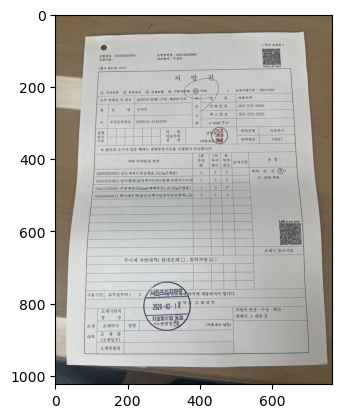

In [491]:
im = Image.open(f"{test_images_base_path}/{test_img_path}")
im = ImageOps.exif_transpose(im)
im_original = copy.deepcopy(im)
im_original = np.array(im_original)
im = im.resize((num_pixels_y, num_pixels_x))
im = np.array(im)
plt.imshow(im)

In [492]:
from models.u2net import U2NETP, U2NET
segment = U2NETP(out_ch=1).to(device)

In [494]:
segmentation_model_path = './weights/mask_0402_fin.pth'

segment.load_state_dict(torch.load(segmentation_model_path))

<All keys matched successfully>

In [495]:
norm_mean = [ 0.485, 0.456, 0.406 ]
norm_std  = [ 0.229, 0.224, 0.225 ]

loader = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize(mean = norm_mean, std = norm_std)])

In [496]:
image = loader(im)
image = image.unsqueeze(0).to(device)

In [497]:
with torch.no_grad():
    mask = segment(image)
    
mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
mask_det = mask_det>0.8

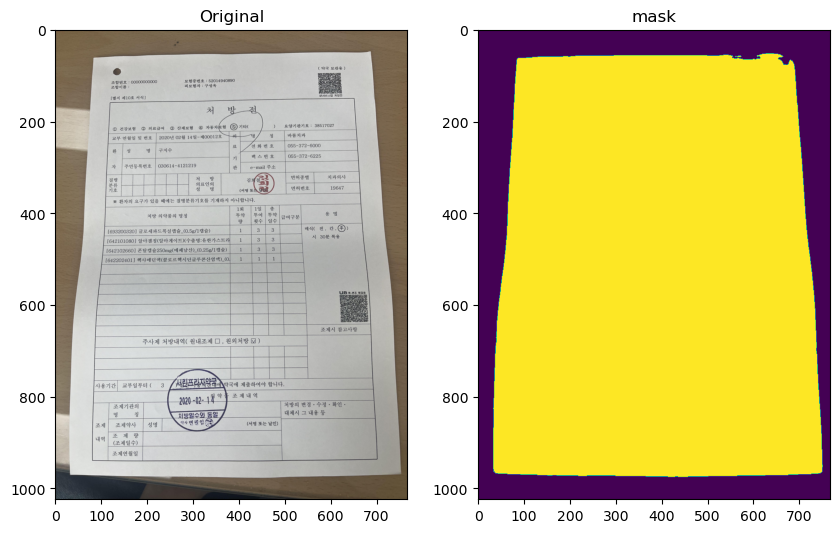

In [498]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -6

axarr[0].imshow(im)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_det[0])
axarr[1].title.set_text('mask', cmap='gray')

In [505]:

contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

simplified_contours = []

for cnt in contours:
    hull = cv2.convexHull(cnt)
    simplified_contours.append(cv2.approxPolyDP(hull,
                                                0.001 * cv2.arcLength(hull, True), True))
biggest_n, approx_contour = biggest_contour(simplified_contours, 12192768)

warped = four_point_transform(im_original, approx_contour)

[[[2694  270]]

 [[2950 3801]]

 [[ 132 3801]]

 [[ 333  250]]]
---------
[[ 333.  250.]
 [2694.  270.]
 [2950. 3801.]
 [ 132. 3801.]]


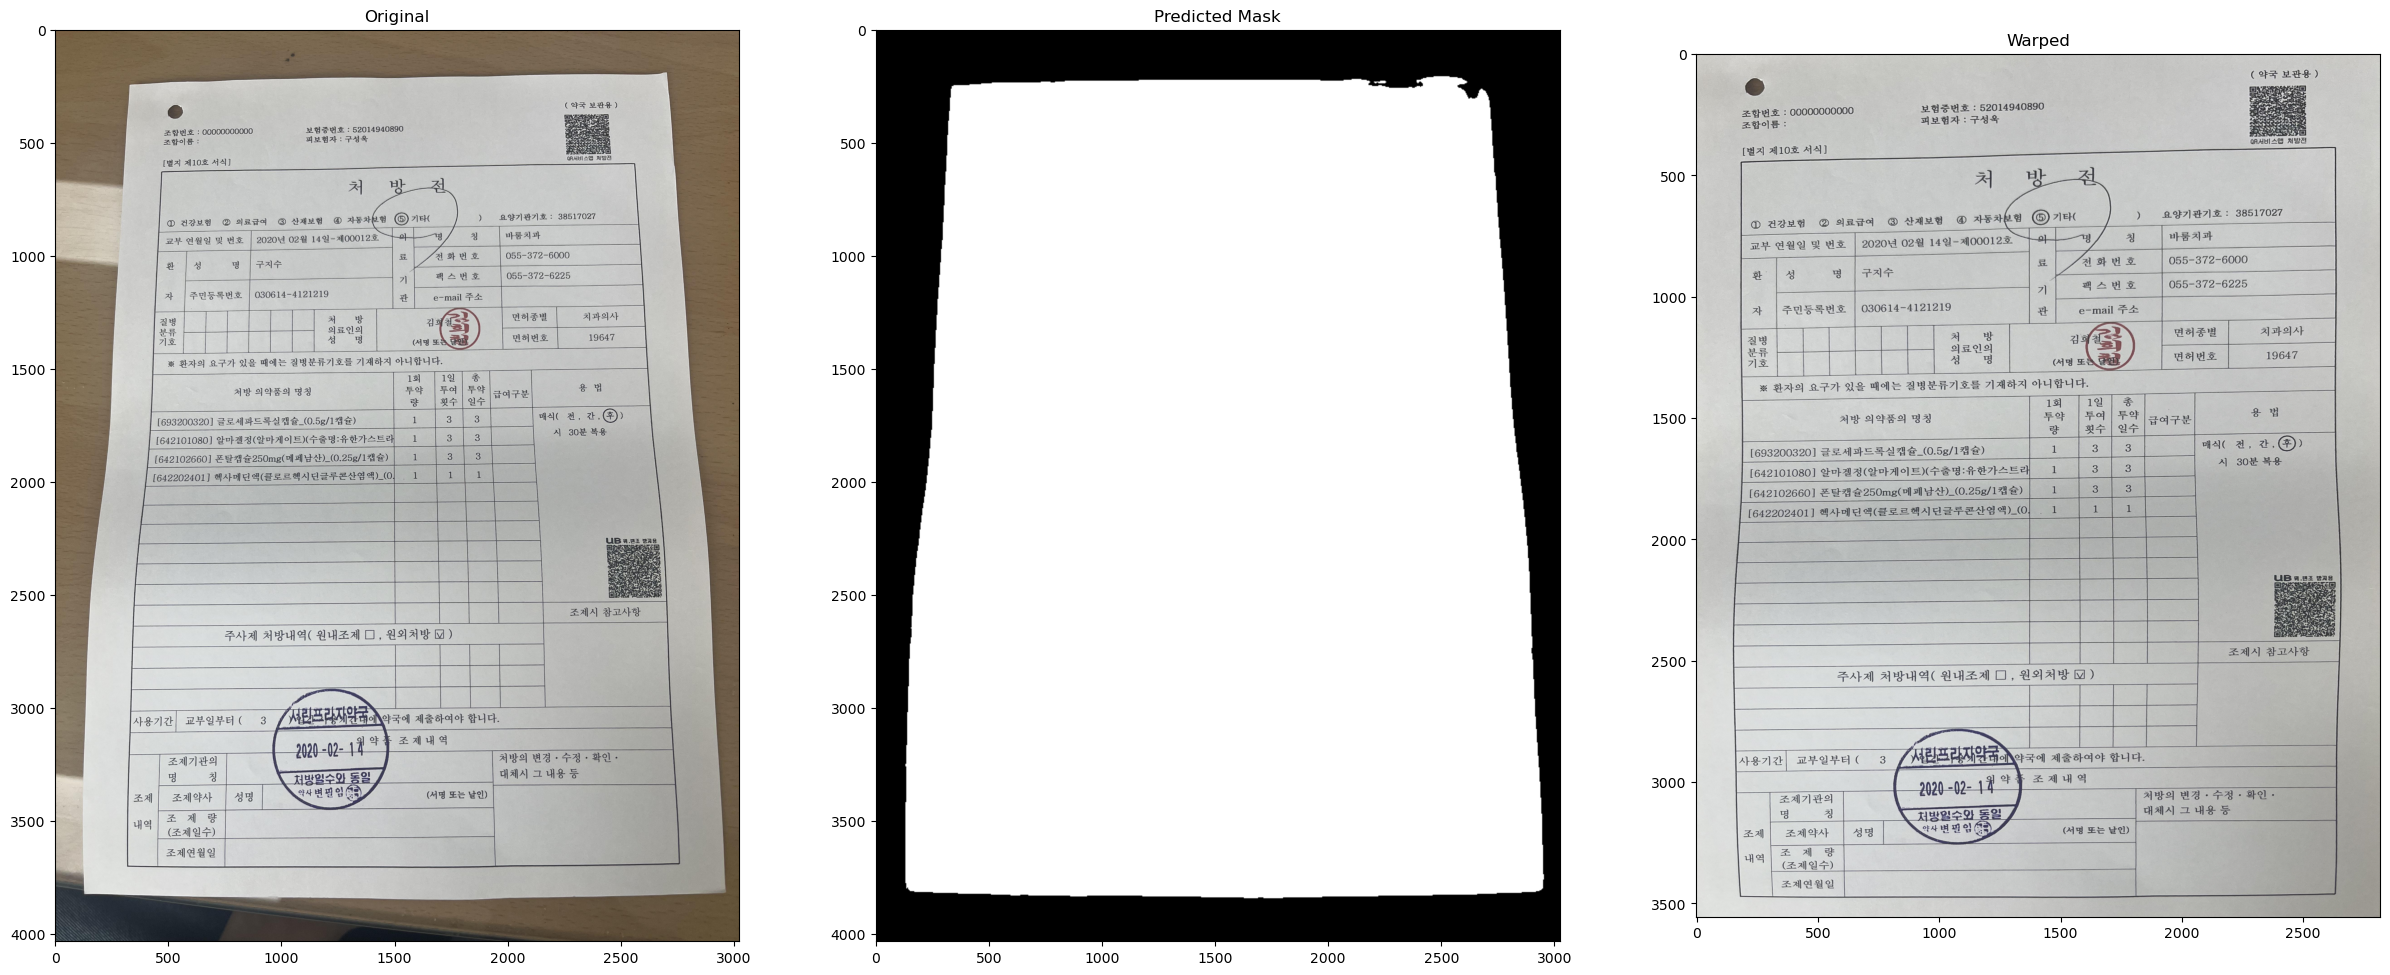

In [448]:
f, axarr = plt.subplots(1,3, figsize=(30,21))

i = -6
#cur_scan = scan_images[i]


axarr[0].imshow(im_original)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_to_find, cmap='gray')
axarr[1].title.set_text('Predicted Mask')

axarr[2].imshow(warped)
axarr[2].title.set_text('Warped')

# Make all masks

In [351]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"
crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_good"
#orig_folder = "final_camera"


from models.u2net import U2NETP, U2NET
segment = U2NETP(out_ch=1).to(device)

segmentation_model_path = './weights/mask_0402_fin.pth'
segment.load_state_dict(torch.load(segmentation_model_path))

loader = transforms.Compose([transforms.ToTensor()])

In [352]:
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3

In [354]:
def biggest_contour(contours, min_area):
    biggest = None
    max_area = 0
    biggest_n = 0
    approx_contour = None
    for n, i in enumerate(contours):
        area = cv2.contourArea(i)

        if area > min_area / 30:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
                biggest_n = n
                approx_contour = approx

    return biggest_n, approx_contour


def order_points(pts):
    pts = pts.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))


    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [1]:
for test_img_path in sorted(os.listdir(test_images_base_path)):

    im = Image.open(f"{test_images_base_path}/{test_img_path}")
    im = ImageOps.exif_transpose(im)
    im_original = copy.deepcopy(im)
    im_original = np.array(im_original)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    
    image = loader(im).float()
    image = image.unsqueeze(0).to(device)
    

    with torch.no_grad():
        mask = segment(image)

    mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
    mask_det = mask_det>0.8

    mask_to_find = mask_det[0]
    mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
    mask_to_find = Image.fromarray(mask_to_find[:,:,0])

    x,y,_ = im_original.shape
    mask_to_find = mask_to_find.resize((y, x))
    mask_to_find = np.array(mask_to_find)
    
    contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    simplified_contours = []

    try:
        for cnt in contours:
            hull = cv2.convexHull(cnt)
            simplified_contours.append(cv2.approxPolyDP(hull,
                                                        0.001 * cv2.arcLength(hull, True), True))
        biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

        warped = four_point_transform(im_original, approx_contour)
        PIL_image = Image.fromarray(warped.astype('uint8'), 'RGB')
        PIL_image.save(f"{crop_images_save_path}/{test_img_path}")
    except Exception as e:
        print(f"error: {e} -- file: {test_img_path}")

    #break

NameError: name 'os' is not defined

# Make cropped images

In [18]:
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageOps
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt


scan_images_base_path = "./data/scan"
scan_cropped_images_base_path = "./data/scan_cropped"

In [24]:
import torch

def make_image_splits(im_scan):
    
#     size_x = 512 # patch size
#     size_y = 384 # patch stride
    size_x = 256 # patch size
    size_y = 256 # patch stride
    torch_cur_scan = torch.from_numpy(im_scan)
    torch_cur_scan = torch_cur_scan.unsqueeze(0)
    torch_cur_scan.shape
    patches_scan = torch_cur_scan.unfold(1, size_x, size_x).unfold(2, size_y, size_y)


    unfold_shape = patches_scan.size()
    patches_scan = patches_scan.contiguous().view(-1, 3, size_x, size_y)
    patches_scan_np = np.array(patches_scan)
    patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

    return patches_scan_np

In [25]:
# num_pixels_x, num_pixels_y, num_channels = 1333//1, 1000//1, 3
num_pixels_x, num_pixels_y, num_channels = 1536*1, 1280*1, 3
# num_pixels_x, num_pixels_y, num_channels = 2048//1, 1536//1, 3
multiplier=1

In [35]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(scan_images_base_path)))):

    cur_count = count * multiplier
    im_scan = Image.open(f"{scan_images_base_path}/{im_path}").convert('RGB')
    im_scan = ImageOps.exif_transpose(im_scan)
    im_scan = im_scan.resize((num_pixels_y, num_pixels_x))
    im_scan = np.array(im_scan)
    
    im_scan_splits = make_image_splits(im_scan)

    for i in range(30):
#         crop_images[cur_count+i] = im_crop_splits[i]
#         scan_images[cur_count+i] = im_scan_splits[i]
        cv2.imwrite(f"{scan_cropped_images_base_path}/{count}_{i}.jpg", cv2.cvtColor(im_scan_splits[i], cv2.COLOR_RGB2BGR))
    
    if count >= 700:
        break
    

    

 55%|███████████████████████████████████████████▌                                   | 700/1269 [01:47<01:27,  6.53it/s]


# Make numpy arrays

In [54]:
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageOps
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt


crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_clean"
scan_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_scan_clean"

# crop_images_save_path = "./data/wrinkle_scan"
# scan_images_base_path = "./data/scan"

# crop_images_save_path = "./data/wrinkle_cropped_scan"
# scan_images_base_path = "./data/scan_cropped"

In [55]:
import torch

def make_image_splits(im_crop, im_scan):
    
#     size_x = 512 # patch size
#     size_y = 384 # patch stride
    size_x = 256 # patch size
    size_y = 256 # patch stride

    torch_cur_orig = torch.from_numpy(im_crop)
    torch_cur_scan = torch.from_numpy(im_scan)

    torch_cur_orig = torch_cur_orig.unsqueeze(0)
    torch_cur_scan = torch_cur_scan.unsqueeze(0)
    torch_cur_orig.shape

    patches_orig = torch_cur_orig.unfold(1, size_x, size_x).unfold(2, size_y, size_y)
    patches_scan = torch_cur_scan.unfold(1, size_x, size_x).unfold(2, size_y, size_y)


    unfold_shape = patches_orig.size()
    patches_orig = patches_orig.contiguous().view(-1, 3, size_x, size_y)
    patches_scan = patches_scan.contiguous().view(-1, 3, size_x, size_y)

    patches_orig_np = np.array(patches_orig)
    patches_scan_np = np.array(patches_scan)

    patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
    patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

    return patches_orig_np, patches_scan_np

In [56]:
# num_pixels_x, num_pixels_y, num_channels = 1333//1, 1000//1, 3
num_pixels_x, num_pixels_y, num_channels = 1536*1, 1280*1, 3
# num_pixels_x, num_pixels_y, num_channels = 2048//1, 1536//1, 3

# num_pixels_x, num_pixels_y, num_channels = 256, 256, 3
multiplier=1

crop_images = np.zeros((len(os.listdir(scan_images_base_path))*multiplier, num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)
scan_images = np.zeros((len(os.listdir(scan_images_base_path))*multiplier, num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)

In [57]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(scan_images_base_path)))):

    cur_count = count * multiplier
    im_crop = Image.open(f"{crop_images_save_path}/{im_path}").convert('RGB')
    im_scan = Image.open(f"{scan_images_base_path}/{im_path}").convert('RGB')
    
    im_crop = ImageOps.exif_transpose(im_crop)
    im_scan = ImageOps.exif_transpose(im_scan)
    
    im_crop = im_crop.resize((num_pixels_y, num_pixels_x))
    im_scan = im_scan.resize((num_pixels_y, num_pixels_x))
    
    im_crop = np.array(im_crop)
    im_scan = np.array(im_scan)
    
    crop_images[count] = im_crop
    scan_images[count] = im_scan
    
    
#     im_crop_splits, im_scan_splits = make_image_splits(im_crop, im_scan)

#     for i in range(30):
#         crop_images[cur_count+i] = im_crop_splits[i]
#         scan_images[cur_count+i] = im_scan_splits[i]
    

    

100%|████████████████████████████████████████████████████████████████████████████████| 513/513 [01:35<00:00,  5.35it/s]


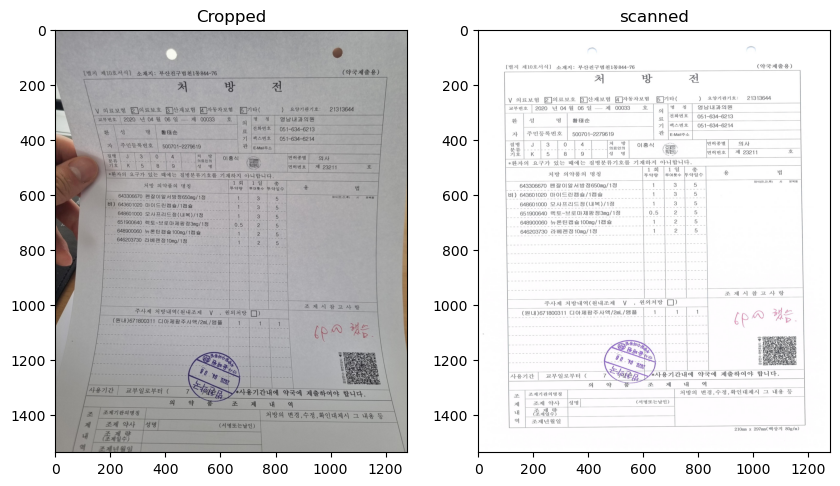

In [58]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -1


cur_orig = crop_images[i]
cur_mask = scan_images[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [59]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"

pixel_size = num_pixels_x

    
with open(f"{base_path}/crop_{pixel_size}_clean.npy", 'wb') as f:
    np.save(f, crop_images)
    
with open(f"{base_path}/scan_{pixel_size}_clean.npy", 'wb') as f:
    np.save(f, scan_images)

In [47]:
import cv2
import copy
def deform(img, perturbed_mesh):
    h,w = img.shape[:2]

    perturbed_mesh_x = perturbed_mesh[:,0]
    perturbed_mesh_y = perturbed_mesh[:,1]
    
    perturbed_mesh_x =perturbed_mesh_x.reshape((h,w))
    perturbed_mesh_y =perturbed_mesh_y.reshape((h,w))

    remapped = cv2.remap(img, perturbed_mesh_x, perturbed_mesh_y, cv2.INTER_LINEAR) 

    return remapped

def get_perturbed_mesh(img):
    """
        Author: papabiceps
        https://stackoverflow.com/q/53907633
    """

    # mesh row & col
    mr,mc = img.shape[:2]

    xx = np.arange(0, mr, 1)
    yy = np.arange(mc-1, -1, -1)

    # yy = np.arange(0, mc, 1)
    [Y, X] = np.meshgrid(xx, yy)

    ms = np.transpose(np.asarray([X.flatten('F'), Y.flatten('F')]), (1,0))

    perturbed_mesh = ms
    nv = np.random.randint(20) - 1

    for k in range(nv):
        #Choosing one vertex randomly
        vidx = np.random.randint(np.shape(ms)[0])
        vtex = ms[vidx, :]
        #Vector between all vertices and the selected one
        xv  = perturbed_mesh - vtex
        #Random movement 
        mv = (np.random.rand(1,2) - 0.5)*15
        hxv = np.zeros((np.shape(xv)[0], np.shape(xv)[1] +1) )
        hxv[:, :-1] = xv
        hmv = np.tile(np.append(mv, 0), (np.shape(xv)[0],1))
        d = np.cross(hxv, hmv)
        d = np.absolute(d[:, 2])
        d = d / (np.linalg.norm(mv, ord=2))
        wt = d
        
        curve_type = np.random.rand(1)
        if curve_type > 0.3:
            alpha = np.random.rand(1) * 50 + 50
            wt = alpha / (wt + alpha)
        else:
            alpha = np.random.rand(1) + 1
            wt = 1 - (wt / 100 )**alpha
        msmv = mv * np.expand_dims(wt, axis=1)

        perturbed_mesh = perturbed_mesh + msmv

        perturbed_mesh = perturbed_mesh.astype(np.float32)

        if perturbed_mesh is not None:
            result = deform(img, perturbed_mesh)

            flipped = cv2.flip(result,1)

            return flipped

In [48]:
# num_pixels_x, num_pixels_y, num_channels = 1024//2, 768//2, 3
# num_pixels_x, num_pixels_y, num_channels = 1600, 1200, 3

aug_x = np.zeros((crop_images.shape), dtype=np.uint8)
aug_y = np.zeros((crop_images.shape), dtype=np.uint8)

In [49]:
count = 0
for x,y in zip(crop_images, scan_images):
    try:
        im_flip = get_perturbed_mesh(copy.deepcopy(x))
        aug_x[count] = im_flip
        aug_y[count] = y
        
        count+=1
    except:
        print("skip: {count}")
        
    if count % 50:
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
skip: {count}
16
17
18
19
20
21
skip: {count}
21
22
23
24
25
26
27
28
skip: {count}
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
60
61
62
63
64
skip: {count}
64
skip: {count}
64
65
66
67
skip: {count}
67
68
69
70
71
skip: {count}
71
72
73
74
75
76
77
78
79
80
skip: {count}
80
81
skip: {count}
81
skip: {count}
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
skip: {count}
96
97
98
99
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
skip: {count}
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
skip: {count}
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
151
152
153
154
155
156
skip: {count}
156
157
158
159
skip: {count}
159
160
161
162
163
164
skip: {count}
164
165
166
167
168
169
170
171
172
173
skip: {count}
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
skip: {count}
201
202
203
20

1386
1387
1388
skip: {count}
1388
1389
skip: {count}
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
skip: {count}
1410
1411
1412
1413
skip: {count}
1413
1414
1415
skip: {count}
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
skip: {count}
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
skip: {count}
1442
1443
1444
1445
1446
1447
1448
1449
skip: {count}
1449
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
skip: {count}
1461
1462
skip: {count}
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
skip: {count}
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1501
1502
1503
1504
1505
1506
1507
skip: {count}
1507
1508
1509
1510
1511
1512
1513
skip: {count}
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
skip: {count}
1532
1533
1534
1535

2591
2592
2593
2594
2595
2596
2597
2598
2599
2601
skip: {count}
2601
2602
2603
2604
skip: {count}
2604
2605
2606
2607
skip: {count}
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
skip: {count}
2640
2641
2642
2643
2644
skip: {count}
2644
2645
2646
2647
2648
2649
2651
2652
skip: {count}
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
skip: {count}
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
skip: {count}
2670
2671
2672
2673
2674
skip: {count}
2674
2675
2676
2677
2678
skip: {count}
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
skip: {count}
2690
2691
2692
2693
2694
2695
skip: {count}
2695
2696
2697
skip: {count}
2697
2698
2699
2701
2702
2703
skip: {count}
2703
skip: {count}
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
skip: {count}
2719
2720
skip: {count}
2720
2721
2722
2723
2724
2725
skip: {count}
272

3760
3761
3762
skip: {count}
3762
3763
3764
3765
3766
3767
3768
3769
3770
skip: {count}
3770
skip: {count}
3770
3771
3772
3773
3774
3775
skip: {count}
3775
3776
3777
3778
3779
skip: {count}
3779
3780
3781
3782
3783
3784
3785
skip: {count}
3785
3786
3787
skip: {count}
3787
skip: {count}
3787
3788
3789
3790
3791
3792
3793
3794
skip: {count}
3794
3795
3796
3797
3798
3799
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
skip: {count}
3812
skip: {count}
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
skip: {count}
3846
3847
3848
3849
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
skip: {count}
3864
3865
skip: {count}
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
skip: {count}
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
skip: {count}
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3901
3

4943
4944
4945
4946
4947
4948
4949
4951
skip: {count}
4951
4952
4953
4954
skip: {count}
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
skip: {count}
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
skip: {count}
4975
skip: {count}
4975
skip: {count}
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
skip: {count}
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5001
5002
5003
5004
skip: {count}
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
skip: {count}
5022
5023
5024
5025
5026
5027
5028
skip: {count}
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5051
5052
5053
5054
5055
5056
skip: {count}
5056
5057
5058
skip: {count}
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
skip: {count}
5067
5068
skip: {count}
5068
5069
5070
skip: {count}
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
skip: {count}
5080
5081
5082
5083
5084
5

6149
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
skip: {count}
6174
6175
6176
6177
6178
6179
6180
6181
skip: {count}
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
skip: {count}
6211
6212
6213
6214
6215
6216
6217
6218
6219
skip: {count}
6219
skip: {count}
6219
6220
6221
6222
6223
6224
6225
6226
6227
skip: {count}
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6251
6252
skip: {count}
6252
6253
6254
skip: {count}
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
skip: {count}
6270
skip: {count}
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
skip: {count}
6286
6287
skip: {count}
6287
skip: {count}
6287
6288
6289
6290
6291
6292
skip: {count}
6292
6293
6294
6295
6296
6297
6298

7352
7353
7354
7355
7356
skip: {count}
7356
7357
7358
7359
skip: {count}
7359
7360
7361
7362
7363
7364
7365
7366
skip: {count}
7366
7367
7368
7369
skip: {count}
7369
7370
7371
skip: {count}
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
skip: {count}
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
skip: {count}
7399
7401
7402
7403
7404
7405
7406
7407
skip: {count}
7407
7408
skip: {count}
7408
skip: {count}
7408
7409
7410
7411
7412
7413
skip: {count}
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
skip: {count}
7451
7452
7453
skip: {count}
7453
skip: {count}
7453
7454
7455
7456
7457
7458
skip: {count}
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
skip: {count}
7484
skip: {count}
7484
7485
7486
7487
7488
7489
74

8527
8528
8529
8530
skip: {count}
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
skip: {count}
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
skip: {count}
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
skip: {count}
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8651
8652
8653
8654
skip: {count}
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
skip: {count}
8666
skip: {count}
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
skip: {count}
8676
8677
8678
skip: {count}
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
skip: {co

9721
9722
9723
skip: {count}
9723
9724
9725
9726
skip: {count}
9726
9727
9728
9729
skip: {count}
9729
9730
9731
skip: {count}
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9751
9752
9753
skip: {count}
9753
9754
9755
9756
9757
skip: {count}
9757
9758
9759
9760
9761
9762
skip: {count}
9762
9763
9764
9765
9766
9767
skip: {count}
9767
9768
9769
9770
skip: {count}
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
skip: {count}
9794
9795
9796
9797
9798
9799
9801
9802
9803
9804
9805
9806
9807
skip: {count}
9807
9808
9809
9810
9811
9812
skip: {count}
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
skip: {count}
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9851
skip: {count}
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
skip: {count}
9860
9861
9862
9863
9864
9865
9866


10824
10825
10826
10827
10828
10829
10830
skip: {count}
10830
10831
10832
skip: {count}
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
skip: {count}
10848
10849
skip: {count}
10849
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
skip: {count}
10865
10866
10867
10868
10869
skip: {count}
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
skip: {count}
10885
skip: {count}
10885
10886
skip: {count}
10886
skip: {count}
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
skip: {count}
10899
10901
skip: {count}
10901
10902
10903
10904
10905
10906
10907
skip: {count}
10907
skip: {count}
10907
10908
10909
10910
skip: {count}
10910
10911
10912
10913
10914
10915
10916
10917
skip: {count}
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
skip: {count}
10927
skip: {count}
10927
10928
10929
10930
10931
1093

11855
11856
skip: {count}
11856
11857
11858
11859
11860
11861
11862
11863
skip: {count}
11863
11864
11865
11866
11867
skip: {count}
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
skip: {count}
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
skip: {count}
11894
11895
11896
11897
11898
11899
skip: {count}
11901
11902
11903
11904
11905
11906
11907
11908
skip: {count}
11908
skip: {count}
11908
11909
11910
11911
11912
11913
skip: {count}
11913
skip: {count}
11913
11914
11915
skip: {count}
11915
11916
11917
skip: {count}
11917
11918
11919
11920
11921
11922
11923
skip: {count}
11923
11924
skip: {count}
11924
11925
11926
11927
skip: {count}
11927
11928
11929
11930
11931
skip: {count}
11931
11932
11933
11934
11935
skip: {count}
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11951
11952
11953
11954
skip: {count}
11954
skip: {count}
11954
11955
11956
11957
11958
11959
11960
11

12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
skip: {count}
12870
12871
12872
12873
12874
12875
12876
12877
skip: {count}
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
skip: {count}
12892
12893
12894
12895
12896
12897
12898
skip: {count}
12898
12899
12901
12902
12903
12904
skip: {count}
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
skip: {count}
12914
12915
12916
12917
12918
skip: {count}
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
skip: {count}
12940
skip: {count}
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12951
12952
12953
skip: {count}
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
skip: {count}
12982
12983
12984
12985
12986


13896
13897
skip: {count}
13897
13898
13899
13901
skip: {count}
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
skip: {count}
13916
13917
13918
13919
skip: {count}
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
skip: {count}
13949
13951
13952
skip: {count}
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
skip: {count}
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
skip: {count}
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
skip: {count}
13998
skip: {count}
13998
skip: {count}
13998
13999
14001
14002
skip: {count}
14002
14003
14004
skip: {count}
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
skip: {count}
14014
14015
14016
skip: {count

14955
14956
skip: {count}
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
skip: {count}
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
skip: {count}
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
skip: {count}
15040
15041
15042
skip: {count}
15042
15043
skip: {count}
15043
15044
15045
15046
15047
15048
15049
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
skip: {count}
15068
skip: {count}
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
skip: {count}
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
skip: {count}
15089
15

15993
15994
15995
15996
skip: {count}
15996
15997
skip: {count}
15997
15998
15999
16001
16002
16003
16004
16005
16006
skip: {count}
16006
16007
16008
skip: {count}
16008
16009
16010
16011
16012
16013
16014
16015
skip: {count}
16015
16016
16017
skip: {count}
16017
skip: {count}
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
skip: {count}
16049
16051
16052
16053
16054
16055
skip: {count}
16055
16056
16057
16058
skip: {count}
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
skip: {count}
16072
16073
skip: {count}
16073
16074
16075
16076
skip: {count}
16076
16077
16078
16079
16080
16081
16082
16083
16084
skip: {count}
16084
16085
skip: {count}
16085
16086
16087
16088
16089
16090
16091
16092
skip: {count}
16092
16093
16094
16095
16096
16097
16098
16099
16101
16102
16103
skip: {count}
16103
16104
skip: 

17006
17007
17008
17009
17010
17011
17012
17013
skip: {count}
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
skip: {count}
17043
17044
17045
17046
17047
skip: {count}
17047
17048
17049
17051
17052
17053
17054
17055
17056
17057
skip: {count}
17057
17058
17059
17060
17061
17062
17063
17064
skip: {count}
17064
17065
17066
17067
17068
skip: {count}
17068
17069
17070
skip: {count}
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
skip: {count}
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
skip: {count}
17098
17099
skip: {count}
17099
17101
17102
17103
17104
17105
17106
17107
skip: {count}
17107
skip: {count}
17107
17108
17109
17110
skip: {count}
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
skip: {count}
17119
17120
skip: {count}
17120
17121
17122
17123
1712

17995
17996
17997
17998
skip: {count}
17998
17999
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
skip: {count}
18026
18027
18028
18029
18030
18031
18032
skip: {count}
18032
18033
18034
skip: {count}
18034
18035
18036
18037
skip: {count}
18037
18038
18039
18040
18041
18042
18043
18044
skip: {count}
18044
18045
skip: {count}
18045
18046
18047
18048
18049
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
skip: {count}
18075
18076
18077
18078
18079
18080
18081
18082
skip: {count}
18082
18083
18084
18085
18086
18087
skip: {count}
18087
18088
18089
18090
18091
skip: {count}
18091
18092
18093
18094
18095
18096
18097
18098
skip: {count}
18098
18099
18101
18102
18103
18104
18105
18106
skip: {count}
18106
18107
18108
skip: {count}
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117


In [50]:
aug_x = aug_x[:count]
aug_y = aug_y[:count]

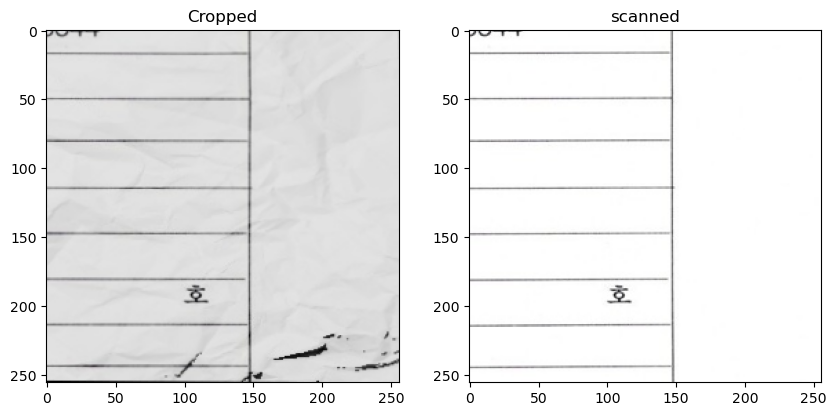

In [51]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -1


cur_orig = aug_x[i]
cur_mask = aug_y[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [52]:
crop_images = np.concatenate([crop_images, aug_x], axis=0)
scan_images = np.concatenate([scan_images, aug_y], axis=0)

In [53]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"

pixel_size = num_pixels_x

    
with open(f"{base_path}/crop_{pixel_size}_sliced_thenaug_30.npy", 'wb') as f:
    np.save(f, aug_x)
    
with open(f"{base_path}/scan_{pixel_size}_sliced_thenaug_30.npy", 'wb') as f:
    np.save(f, aug_y)

# Make wrinkled images

In [37]:
import os
# base_path = "./data/scan"
# file_names = os.listdir(base_path)

# for count, file_name in enumerate(file_names):
#     os.rename(f"{base_path}/{file_name}", f"{base_path}/{count}.jpg")

In [780]:
# import os
# base_path = "./data/scan"
# file_names = os.listdir(base_path)
# next_file_name = len(file_names) + 1

# for count, file_name in enumerate(file_names):
# #     os.rename(f"{base_path}/{file_name}", f"{base_path}/{count}.jpg")


#     img = cv2.imread(f"{base_path}/{file_name}")#.astype("float32") / 255.0
#     new_file_name = f"{int(file_name.split('.')[0]) + next_file_name}.jpg"
#     print(f"{file_name}: {new_file_name}")
#     cv2.imwrite(f"{base_path}/{new_file_name}", img)
#     #break
    

0.jpg: 636.jpg
1.jpg: 637.jpg
10.jpg: 646.jpg
100.jpg: 736.jpg
101.jpg: 737.jpg
102.jpg: 738.jpg
103.jpg: 739.jpg
104.jpg: 740.jpg
105.jpg: 741.jpg
106.jpg: 742.jpg
107.jpg: 743.jpg
108.jpg: 744.jpg
109.jpg: 745.jpg
11.jpg: 647.jpg
110.jpg: 746.jpg
111.jpg: 747.jpg
112.jpg: 748.jpg
113.jpg: 749.jpg
114.jpg: 750.jpg
115.jpg: 751.jpg
116.jpg: 752.jpg
117.jpg: 753.jpg
118.jpg: 754.jpg
119.jpg: 755.jpg
12.jpg: 648.jpg
120.jpg: 756.jpg
121.jpg: 757.jpg
122.jpg: 758.jpg
123.jpg: 759.jpg
124.jpg: 760.jpg
125.jpg: 761.jpg
126.jpg: 762.jpg
127.jpg: 763.jpg
128.jpg: 764.jpg
129.jpg: 765.jpg
13.jpg: 649.jpg
130.jpg: 766.jpg
131.jpg: 767.jpg
132.jpg: 768.jpg
133.jpg: 769.jpg
134.jpg: 770.jpg
135.jpg: 771.jpg
136.jpg: 772.jpg
137.jpg: 773.jpg
138.jpg: 774.jpg
139.jpg: 775.jpg
14.jpg: 650.jpg
140.jpg: 776.jpg
141.jpg: 777.jpg
142.jpg: 778.jpg
143.jpg: 779.jpg
144.jpg: 780.jpg
145.jpg: 781.jpg
146.jpg: 782.jpg
147.jpg: 783.jpg
148.jpg: 784.jpg
149.jpg: 785.jpg
15.jpg: 651.jpg
150.jpg: 786.jpg
151.jpg

527.jpg: 1163.jpg
528.jpg: 1164.jpg
529.jpg: 1165.jpg
53.jpg: 689.jpg
530.jpg: 1166.jpg
531.jpg: 1167.jpg
532.jpg: 1168.jpg
533.jpg: 1169.jpg
534.jpg: 1170.jpg
535.jpg: 1171.jpg
536.jpg: 1172.jpg
537.jpg: 1173.jpg
538.jpg: 1174.jpg
539.jpg: 1175.jpg
54.jpg: 690.jpg
540.jpg: 1176.jpg
541.jpg: 1177.jpg
542.jpg: 1178.jpg
543.jpg: 1179.jpg
544.jpg: 1180.jpg
545.jpg: 1181.jpg
546.jpg: 1182.jpg
547.jpg: 1183.jpg
548.jpg: 1184.jpg
549.jpg: 1185.jpg
55.jpg: 691.jpg
550.jpg: 1186.jpg
551.jpg: 1187.jpg
552.jpg: 1188.jpg
553.jpg: 1189.jpg
554.jpg: 1190.jpg
555.jpg: 1191.jpg
556.jpg: 1192.jpg
557.jpg: 1193.jpg
558.jpg: 1194.jpg
559.jpg: 1195.jpg
56.jpg: 692.jpg
560.jpg: 1196.jpg
561.jpg: 1197.jpg
562.jpg: 1198.jpg
563.jpg: 1199.jpg
564.jpg: 1200.jpg
565.jpg: 1201.jpg
566.jpg: 1202.jpg
567.jpg: 1203.jpg
568.jpg: 1204.jpg
569.jpg: 1205.jpg
57.jpg: 693.jpg
570.jpg: 1206.jpg
571.jpg: 1207.jpg
572.jpg: 1208.jpg
573.jpg: 1209.jpg
574.jpg: 1210.jpg
575.jpg: 1211.jpg
576.jpg: 1212.jpg
577.jpg: 1213.jpg
57

In [40]:
import math
import cv2
import numpy as np
import random
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

base_path_scan = "./data/scan_cropped"
base_path_wrinkle = "./data/wrinkle"
base_path_save = "./data/wrinkle_cropped_scan"

for file_name in sorted(os.listdir(base_path_scan)):
    img = cv2.imread(f"{base_path_scan}/{file_name}").astype("float32") / 255.0
    img -= random.uniform(0.1, 0.5)
    hh, ww = img.shape[:2]

    # im_scan = cv2.cvtColor(im_scan,cv2.COLOR_BGR2RGB) 
#     wrinkles = cv2.imread(f"{base_path_wrinkle}/{np.random.randint(0,7)}.jpg", 0).astype("float32") / 255.0
    wrinkles = cv2.imread(f"{base_path_wrinkle}/{4}.jpg", 0).astype("float32") / 255.0
    
    
    # resize wrinkles to same size as cat image
    wrinkles = cv2.rotate(wrinkles, np.random.randint(0, 3))
    wrinkles = cv2.resize(wrinkles, (ww,hh), fx=0, fy=0)
    
    rand = random.uniform(0,1)
    if rand <= 0.25:
        # shift image brightness so mean is (near) mid gray
        mean = np.mean(wrinkles)
        shift = mean - 0.4
        wrinkles = cv2.subtract(wrinkles, shift)

        # create folds image as diagonal grayscale gradient as float as plus and minus equal amount
        hh1 = math.ceil(hh/2)
        ww1 = math.ceil(ww/3)
        val = math.sqrt(0.2)
        grady = np.linspace(-val, val, hh1, dtype=np.float32)
        gradx = np.linspace(-val, val, ww1, dtype=np.float32)
        grad1 = np.outer(grady, gradx)

        # flip grad in different directions
        grad2 = cv2.flip(grad1, 0)
        grad3 = cv2.flip(grad1, 1)
        grad4 = cv2.flip(grad1, -1)

        # concatenate to form folds image
        foldx1 = np.hstack([grad1-0.1,grad2,grad3])
        foldx2 = np.hstack([grad2+0.1,grad3,grad1+0.2])
        folds = np.vstack([foldx1,foldx2])
        #folds = (1-val)*folds[0:hh, 0:ww]
        folds = folds[0:hh, 0:ww]

        # add the folds image to the wrinkles image
        wrinkle_folds = cv2.add(wrinkles, folds)

        # draw creases as blurred lines on black background
        creases = np.full((hh,ww), 0, dtype=np.float32)
        ww2 = 2*ww1
        cv2.line(creases, (0,hh1), (ww-1,hh1), 0.25, 1)
        cv2.line(creases, (ww1,0), (ww1,hh-1),  0.25, 1)
        cv2.line(creases, (ww2,0), (ww2,hh-1),  0.25, 1)

        # blur crease image
        creases = cv2.GaussianBlur(creases, (3,3), 0)

        # add crease to wrinkles_fold image
        wrinkle_folds_creases = cv2.add(wrinkle_folds, creases)

        # threshold wrinkles and invert
        thresh = cv2.threshold(wrinkle_folds_creases,0.7,1,cv2.THRESH_BINARY)[1]
        thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR) 
        thresh_inv = 1-thresh

        # convert from grayscale to bgr 
        wrinkle_folds_creases = cv2.cvtColor(wrinkle_folds_creases,cv2.COLOR_GRAY2BGR) 

        low = 2.0 * img * wrinkle_folds_creases
        high = 1 - 2.0 * (1-img) * (1-wrinkle_folds_creases)
        result = ( 255 * (low * thresh_inv + high * thresh) ).clip(0, 255).astype(np.uint8)
        
    elif rand > 0.25 and rand <= 0.75 :
        wrinkles = 1.33 * wrinkles -0.33

        # threshold wrinkles and invert
        thresh = cv2.threshold(wrinkles,0.5,1,cv2.THRESH_BINARY)[1]
        thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR) 
        thresh_inv = 1-thresh

        # shift image brightness so mean is mid gray
        mean = np.mean(wrinkles)
        shift = mean - 0.5
        wrinkles = cv2.subtract(wrinkles, shift)

        # convert wrinkles from grayscale to rgb
        wrinkles = cv2.cvtColor(wrinkles,cv2.COLOR_GRAY2BGR) 

        # do hard light composite and convert to uint8 in range 0 to 255
        # see CSS specs at https://www.w3.org/TR/compositing-1/#blendinghardlight
        low = 2.0 * img * wrinkles
        high = 1 - 2.0 * (1-img) * (1-wrinkles)
        result = ( 255 * (low * thresh_inv + high * thresh) ).clip(0, 255).astype(np.uint8)

    
    else:
        result = cv2.imread(f"{base_path_scan}/{file_name}")
    

    cv2.imwrite(f"{base_path_save}/{file_name}", result)
#     break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


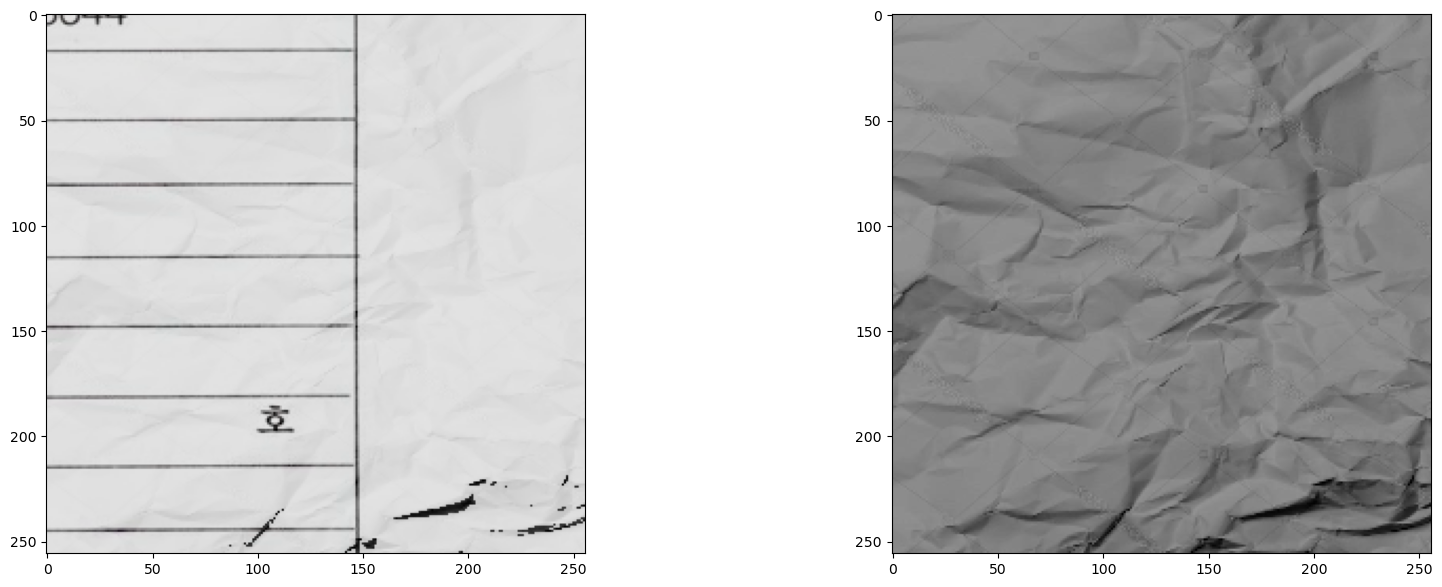

In [41]:
f, axarr = plt.subplots(1,2, figsize=(20,7))

axarr[0].imshow(result)
axarr[1].imshow(wrinkles)

In [184]:
import torch

def preprocess_image_splits(im_crop):
    
    size_x = 800 # patch size
    size_y = 600 # patch stride

    patches_crop = im_crop.unfold(2, size_x, size_x).unfold(3, size_y, size_y)
    patches_crop = patches_crop.contiguous().view(-1, 3, size_x, size_y)

    unfold_shape = patches_crop.size()
    print(patches_crop.shape)

In [175]:
im_crop.shape

(1600, 1200, 3)

In [183]:
torch_cur_crop = torch.from_numpy(im_crop)
torch_cur_crop = torch_cur_crop.unsqueeze(0)
torch_cur_crop = torch_cur_crop.permute(0,3, 1,2)
torch_cur_crop.shape

torch.Size([1, 3, 1600, 1200])

In [185]:
preprocess_image_splits(torch_cur_crop)

torch.Size([4, 3, 800, 600])


In [163]:
import torch
i = 0

cur_orig = crop_images[i]
cur_mask = scan_images[i]

In [138]:
torch_cur_orig = torch.from_numpy(cur_orig)
torch_cur_scan = torch.from_numpy(cur_mask)

torch_cur_orig = torch_cur_orig.unsqueeze(0)
torch_cur_scan = torch_cur_scan.unsqueeze(0)
torch_cur_orig.shape

torch.Size([1, 800, 600, 3])

In [123]:
size_x = 800 # patch size
size_y = 600 # patch stride
patches_orig = torch_cur_orig.unfold(1, size_x, size_x).unfold(2, size_y, size_y)
patches_scan = torch_cur_scan.unfold(1, size_x, size_x).unfold(2, size_y, size_y)

In [124]:
unfold_shape = patches_orig.size()
patches_orig = patches_orig.contiguous().view(-1, 3, size_x, size_y)
patches_scan = patches_scan.contiguous().view(-1, 3, size_x, size_y)



patches_orig_np = np.array(patches_orig)
patches_scan_np = np.array(patches_scan)

patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

In [125]:
patches_orig_np.shape

(4, 800, 600, 3)

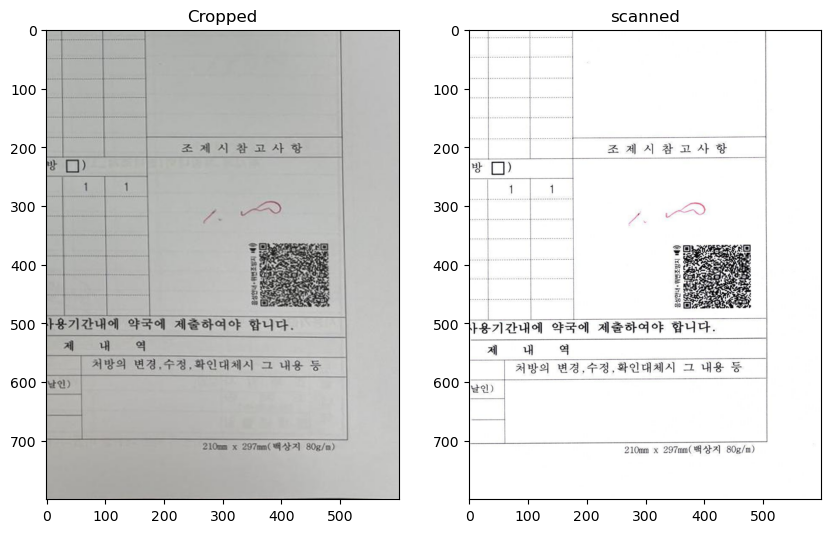

In [113]:
f, axarr = plt.subplots(1,2, figsize=(10,7))
i = 3
axarr[0].imshow(patches_orig_np[i])
axarr[0].title.set_text('Cropped')

axarr[1].imshow(patches_scan_np[i], cmap='gray')
axarr[1].title.set_text('scanned')

In [114]:
unfold_shape

torch.Size([1, 2, 2, 3, 800, 600])

In [115]:
patches_orig = patches_orig.view(unfold_shape)
patches_scan = patches_scan.view(unfold_shape)

output_c = 3
output_h = 1600
output_w = 1200
patches_orig = patches_orig.permute(0, 3, 1, 4, 2, 5).contiguous()
patches_scan = patches_scan.permute(0, 3, 1, 4, 2, 5).contiguous()

patches_orig = patches_orig.view(1, output_c, output_h, output_w)
patches_scan = patches_scan.view(1, output_c, output_h, output_w)

In [116]:
patches_orig_np = np.array(patches_orig)
patches_scan_np = np.array(patches_scan)

patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

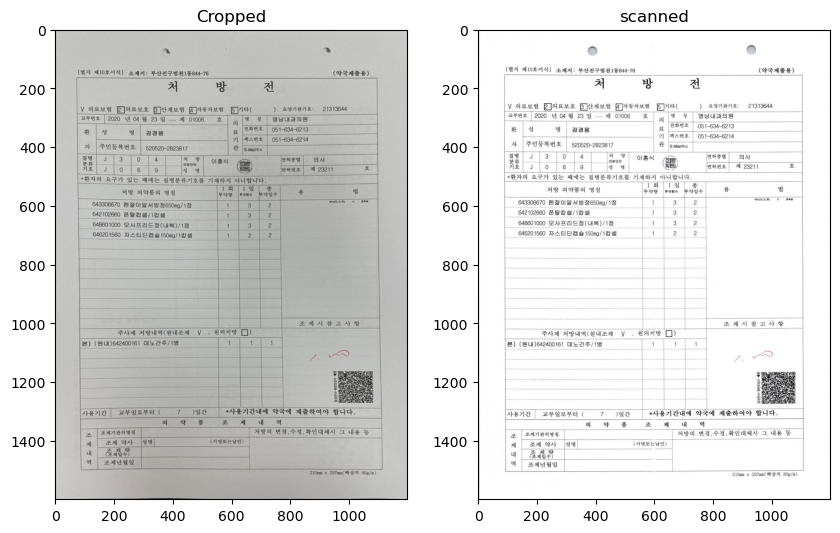

In [117]:
f, axarr = plt.subplots(1,2, figsize=(10,7))
i = 0
axarr[0].imshow(patches_orig_np[i])
axarr[0].title.set_text('Cropped')

axarr[1].imshow(patches_scan_np[i], cmap='gray')
axarr[1].title.set_text('scanned')